<h1>Heart Failure Prediction: Final Project</h1>

**Dataset Name**: Heart Failure Prediction

**Description**: This dataset contains clinical records of patients who were diagnosed with heart failure. The data is intended to aid in the prediction of heart failure outcomes based on various clinical and demographic features. It includes 12 features collected during follow-up visits.

**Source**: The dataset is sourced from Kaggle [link](https://www.kaggle.com/datasets/andrewmvd/heart-failure-clinical-data/data)

**Citation**: Davide Chicco, Giuseppe Jurman: Machine learning can predict survival of patients with heart failure from serum creatinine and ejection fraction alone. BMC Medical Informatics and Decision Making 20, 16 (2020). ([link](https://bmcmedinformdecismak.biomedcentral.com/articles/10.1186/s12911-020-1023-5))

**Objective**: To develop a predictive model to identify patients at risk of heart failure. By analyzing the clinical features, the model can help healthcare providers take preventive measures and improve patient outcomes:

1.   Identify key clinical indicators that are predictive of heart failure
2.   Evaluate different machine learning models to find a most accurate predictor
3.   Provide actionable insights for healthcare providers to improve management and preventive care for patients.





<h2>Explanation of each column:</h2>

| Column Name       | Description                                              | Data Type | Notes                               |
|-------------------|----------------------------------------------------------|-----------|-------------------------------------|
| age               | Age of the patient                                       | Integer   | Years                               |
| anaemia           | Presence of anemia                                       | Integer   | 1: Yes, 0: No                       |
| creatinine_phosphokinase | Level of the CPK enzyme in the blood                 | Integer   | mcg/L                               |
| diabetes          | Presence of diabetes                                     | Integer   | 1: Yes, 0: No                       |
| ejection_fraction | Percentage of blood leaving the heart with each contraction | Integer   | Percentage                          |
| high_blood_pressure | Presence of high blood pressure                        | Integer   | 1: Yes, 0: No                       |
| platelets         | Platelet count in the blood                              | Float     | kiloplatelets/mL                    |
| serum_creatinine  | Level of serum creatinine in the blood                   | Float     | mg/dL                               |
| serum_sodium      | Level of serum sodium in the blood                       | Integer   | mEq/L                               |
| sex               | Gender of the patient                                    | Integer   | 1: Male, 0: Female                  |
| smoking           | Smoking status                                           | Integer   | 1: Yes, 0: No                       |
| time              | Follow-up period (days)                                  | Integer   | Days                                |
| DEATH_EVENT       | Death event (target variable)                            | Integer   | 1: Yes, 0: No                       |


###Visual inspection of the data

In [15]:
import pandas as pd
import numpy as np

# Create a DataFrame
df = pd.read_csv('Healthcare_Heart.csv')

print("First 5 rows of the DataFrame:")
print(df.head())

# Add blank lines for readability
print()
print()

# Information about DataFrame size
num_rows, num_columns = df.shape
print(f"The DataFrame has {num_rows} rows and {num_columns} columns.")

First 5 rows of the DataFrame:
    age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0  75.0        0                       582         0                 20   
1  55.0        0                      7861         0                 38   
2  65.0        0                       146         0                 20   
3  50.0        1                       111         0                 20   
4  65.0        1                       160         1                 20   

   high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
0                    1  265000.00               1.9           130    1   
1                    0  263358.03               1.1           136    1   
2                    0  162000.00               1.3           129    1   
3                    0  210000.00               1.9           137    1   
4                    0  327000.00               2.7           116    0   

   smoking  time  DEATH_EVENT  
0        0     4            1  
1        

###Exploratory Data Analysis (EDA)

Dataframe Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.

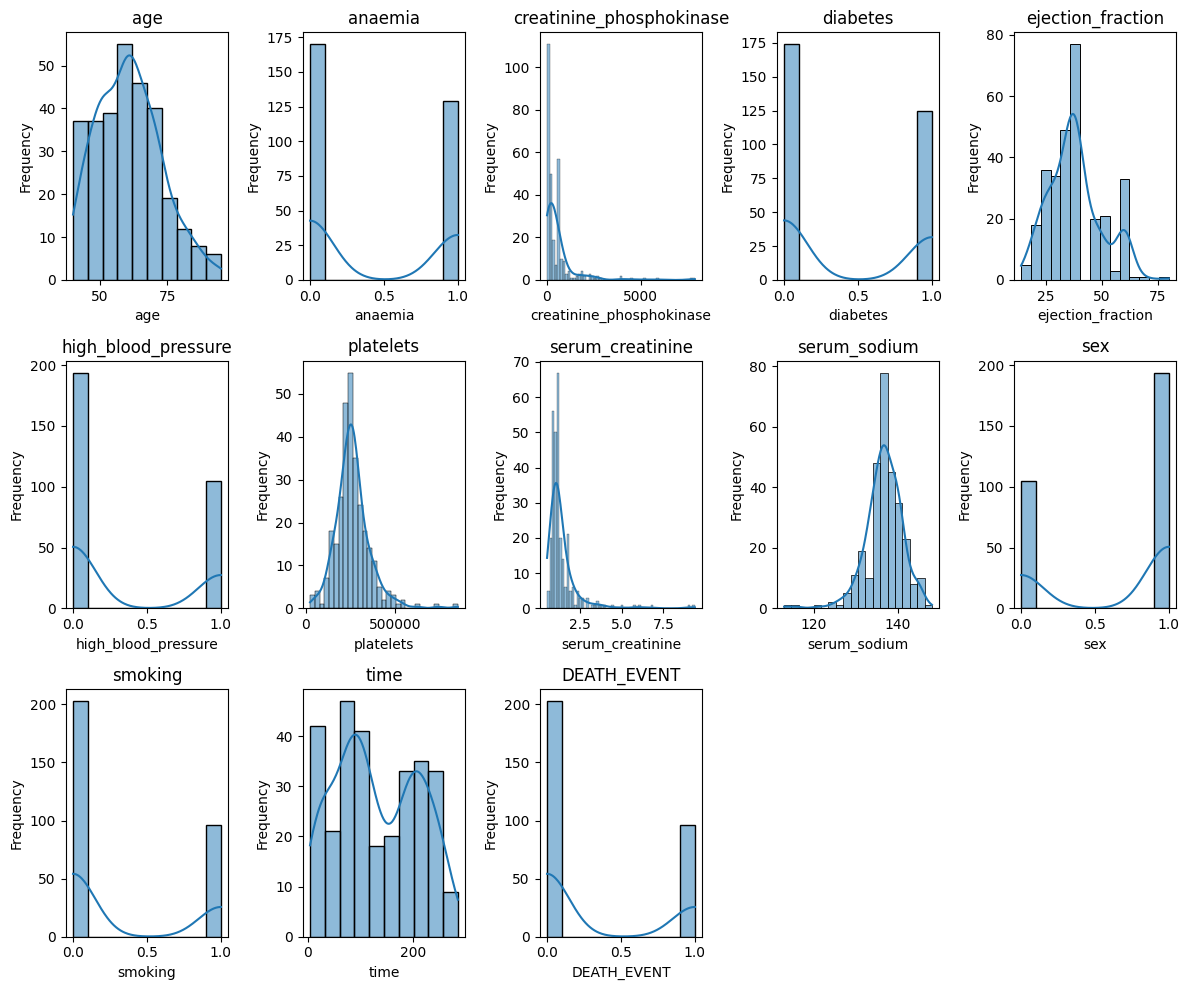


Correlation Summaries:
smoking and sex: There is a moderate correlation (0.4459).
DEATH_EVENT and time: There is a moderate correlation (-0.5270).


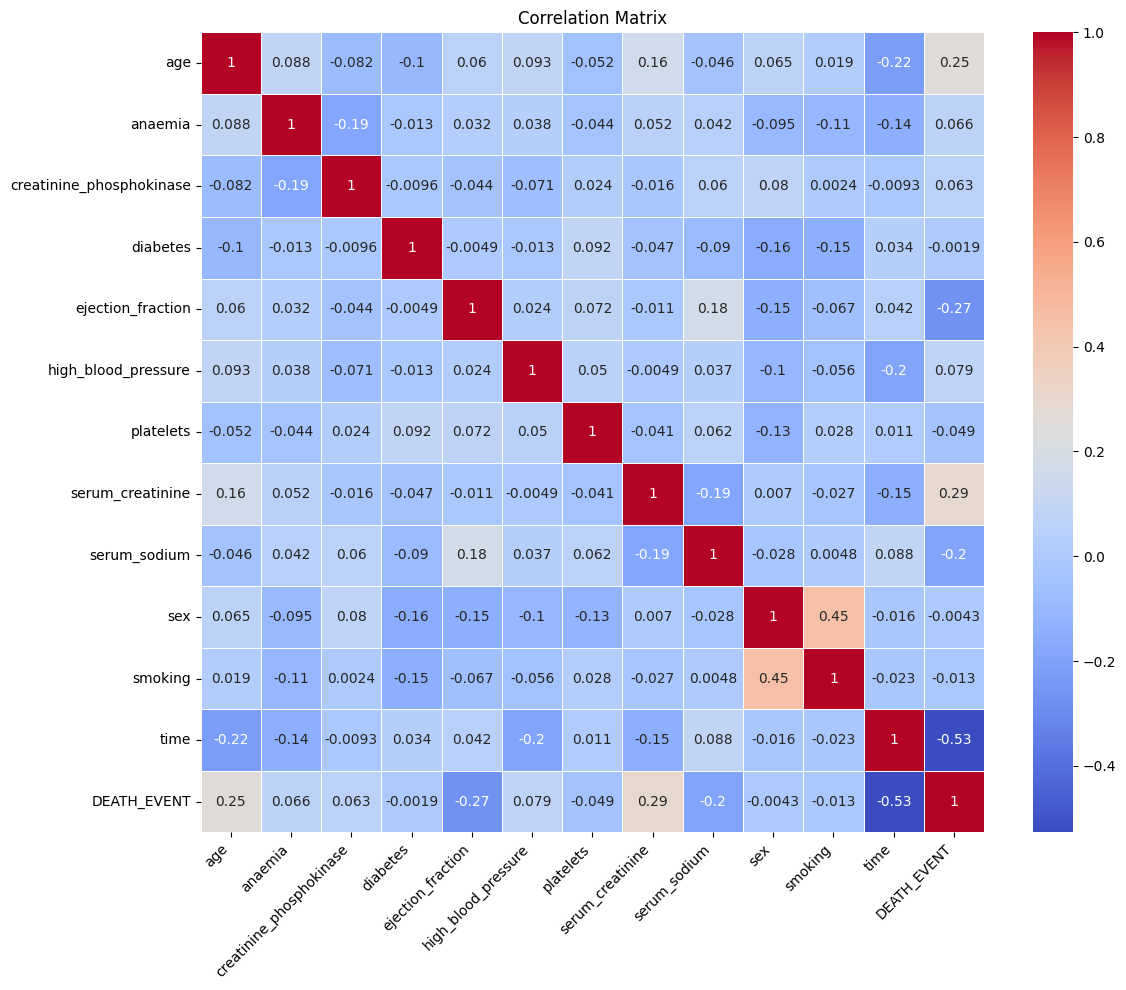


Variance of Numerical Columns:
age                         1.414865e+02
anaemia                     2.461224e-01
creatinine_phosphokinase    9.414586e+05
diabetes                    2.441023e-01
ejection_fraction           1.400635e+02
high_blood_pressure         2.286144e-01
platelets                   9.565669e+09
serum_creatinine            1.070211e+00
serum_sodium                1.946996e+01
sex                         2.286144e-01
smoking                     2.187156e-01
time                        6.023965e+03
DEATH_EVENT                 2.187156e-01
dtype: float64


In [17]:
# Dataframe Information
print("Dataframe Information:")
print(df.info())

# Check for missing values
missing_values = df.isnull().sum().sum()  # Total number of missing values in the DataFrame
print()
if missing_values == 0:
    print("There are no missing values in the DataFrame.")
else:
    print(f"There are {missing_values} missing values in the DataFrame.")
print()

# Descriptive statistics
print("Descriptive Statistics:")
print(df.describe())
print()

import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

# Check for outliers - 13 numerical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
# Using IQR method for each numerical column
for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    if not outliers.empty:
        print(f"Column '{col}' has {len(outliers)} outliers according to IQR method.")
print()
print("At this point, we will keep the outliers as they may be clinically significant and represent real,\nvalid cases. It may also ensure that the future model accounts for any possible scenarious including extreme cases.")
print()
print()

print("Histograms:")
print()
# Histograms for numerical columns
plt.figure(figsize=(12, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(3, 5, i + 1)
    sns.histplot(df[col], kde=True)
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()
print()

# Correlation matrix
corr_matrix = df.corr()

# Define thresholds for interpreting correlations
moderate_corr_threshold = 0.3
high_corr_threshold = 0.6

# Function to summarize correlations
def summarize_correlations(corr_matrix):
    print("Correlation Summaries:")
    visited_pairs = set()  # To keep track of visited pairs
    for i, col in enumerate(corr_matrix.columns):
        for j, row in enumerate(corr_matrix.index):
            if i != j:  # Exclude self-correlation (diagonal elements)
                pair = tuple(sorted([row, col]))  # Sort pair to avoid duplicate output
                if pair not in visited_pairs:
                    visited_pairs.add(pair)
                    correlation = corr_matrix.loc[row, col]  # Access correlation value
                    if abs(correlation) >= high_corr_threshold:
                        print(f"{row} and {col}: There is a high correlation ({correlation:.4f}).")
                    elif abs(correlation) >= moderate_corr_threshold:
                        print(f"{row} and {col}: There is a moderate correlation ({correlation:.4f}).")



# Print correlation summaries
summarize_correlations(corr_matrix)

# Visualize correlation matrix as heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

print()

# Calculate variance for numerical columns
print("Variance of Numerical Columns:")
variances = df[numerical_cols].var()
print(variances)


###Feature Selection

In [22]:
variance_threshold = 1.0

# Filter features based on variance threshold
selected_features = variances[variances >= variance_threshold].index.tolist()

# Print selected features
print("Selected Features based on Variance Threshold:")
print(selected_features)


Selected Features based on Variance Threshold:
['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium', 'time']


##Data Preparation

In [24]:
from sklearn.model_selection import train_test_split

# Feature selection based on variance threshold
selected_features = ['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium', 'time']

# Identifying the Target
target = 'DEATH_EVENT'

# Use only selected features
X = df[selected_features]
y = df[target]

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print out to confirm
print("Selected Features based on Variance Threshold:")
print(selected_features)
print(f"Target: {target}")
print("Data Preparation Completed:")
print(f"Training set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")


Selected Features based on Variance Threshold:
['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium', 'time']
Target: DEATH_EVENT
Data Preparation Completed:
Training set size: 239 samples
Testing set size: 60 samples


##Algorithms

In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import warnings

# Instantiate the classifiers
log_reg = LogisticRegression(random_state=42)
rf_classifier = RandomForestClassifier(random_state=42)
gb_classifier = GradientBoostingClassifier(random_state=42)
svm_classifier = SVC(random_state=42)

# Train and evaluate each model
def train_and_evaluate(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    train_accuracy = accuracy_score(y_train, y_train_pred)
    train_precision = precision_score(y_train, y_train_pred)
    train_recall = recall_score(y_train, y_train_pred)
    train_f1 = f1_score(y_train, y_train_pred)

    test_accuracy = accuracy_score(y_test, y_test_pred)
    test_precision = precision_score(y_test, y_test_pred)
    test_recall = recall_score(y_test, y_test_pred)
    test_f1 = f1_score(y_test, y_test_pred)

    print(f"{type(model).__name__}:")
    print(f"Train - Accuracy: {train_accuracy:.4f}, Precision: {train_precision:.4f}, Recall: {train_recall:.4f}, F1 Score: {train_f1:.4f}")
    print(f"Test  - Accuracy: {test_accuracy:.4f}, Precision: {test_precision:.4f}, Recall: {test_recall:.4f}, F1 Score: {test_f1:.4f}")
    print()

# Train and evaluate Logistic Regression
train_and_evaluate(log_reg, X_train, X_test, y_train, y_test)

# Train and evaluate Random Forest Classifier
train_and_evaluate(rf_classifier, X_train, X_test, y_train, y_test)

# Train and evaluate Gradient Boosting Classifier
train_and_evaluate(gb_classifier, X_train, X_test, y_train, y_test)

# Train and evaluate SVM Classifier
train_and_evaluate(svm_classifier, X_train, X_test, y_train, y_test)


# Suppress warnings for undefined precision during evaluation
warnings.filterwarnings('ignore', category=UserWarning, module='sklearn')

LogisticRegression:
Train - Accuracy: 0.8410, Precision: 0.7705, Recall: 0.6620, F1 Score: 0.7121
Test  - Accuracy: 0.8000, Precision: 0.8824, Recall: 0.6000, F1 Score: 0.7143

RandomForestClassifier:
Train - Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1 Score: 1.0000
Test  - Accuracy: 0.7000, Precision: 0.7059, Recall: 0.4800, F1 Score: 0.5714

GradientBoostingClassifier:
Train - Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1 Score: 1.0000
Test  - Accuracy: 0.7500, Precision: 0.7778, Recall: 0.5600, F1 Score: 0.6512

SVC:
Train - Accuracy: 0.7029, Precision: 0.0000, Recall: 0.0000, F1 Score: 0.0000
Test  - Accuracy: 0.5833, Precision: 0.0000, Recall: 0.0000, F1 Score: 0.0000



###Hyperparameter Tuning



Reduced Parameter Grids for RandomForestClassifier

In [56]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score

# Define a narrower parameter grid for RandomizedSearchCV
param_grid_rf = {
    'n_estimators': randint(50, 100),
    'max_depth': randint(3, 6),
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 5)
}

# Instantiate RandomForestClassifier with default hyperparameters
rf = RandomForestClassifier(random_state=42)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Perform RandomizedSearchCV with reduced parameters
rf_random = RandomizedSearchCV(estimator=rf, param_distributions=param_grid_rf, n_iter=30,
                               cv=3, verbose=2, random_state=42, n_jobs=-1)
rf_random.fit(X_train, y_train)

# Get the best estimator from RandomizedSearchCV
best_rf = rf_random.best_estimator_

# Train and evaluate function with improved output format
def train_and_evaluate(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    print(f"{type(model).__name__}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    print()

# Evaluate best Random Forest model
print("Random Forest Classifier - Best Parameters:")
print(rf_random.best_params_)
train_and_evaluate(best_rf, X_train, X_test, y_train, y_test)


Fitting 3 folds for each of 30 candidates, totalling 90 fits
Random Forest Classifier - Best Parameters:
{'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 4, 'n_estimators': 72}
RandomForestClassifier
Accuracy: 0.9417
Precision: 0.9436
Recall: 0.9417
F1 Score: 0.9417

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        33
           1       0.87      0.93      0.90        28
           2       0.97      1.00      0.99        33
           3       1.00      0.91      0.95        34
           4       0.98      0.96      0.97        46
           5       0.94      0.94      0.94        47
           6       0.97      0.97      0.97        35
           7       0.87      1.00      0.93        34
           8       0.96      0.87      0.91        30
           9       0.90      0.88      0.89        40

    accuracy                           0.94       360
   macro avg       0.94      0.94      0.94    

Reduced Parameter Grids for GradientBoostingClassifier

In [60]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import RandomizedSearchCV, train_test_split

# Define a very simplified parameter grid for GradientBoostingClassifier
param_grid_gb = {
    'learning_rate': [0.1],
    'n_estimators': [100],
    'max_depth': [3],
}

# Instantiate Gradient Boosting Classifier
gb = GradientBoostingClassifier(random_state=42)

# Split data into train and test sets (assuming X_train, X_test, y_train, y_test are already defined)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Perform RandomizedSearchCV for Gradient Boosting
gb_random = RandomizedSearchCV(estimator=gb, param_distributions=param_grid_gb, n_iter=1,
                               cv=3, verbose=2, random_state=42, n_jobs=-1)
gb_random.fit(X_train, y_train)

# Get the best estimator from RandomizedSearchCV
best_gb = gb_random.best_estimator_

# Train and evaluate best Gradient Boosting model
def train_and_evaluate(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    print(type(model).__name__)
    print(f"Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1 Score: {f1:.4f}")
    print(classification_report(y_test, y_pred))
    print()

# Train and evaluate best Gradient Boosting model
print("Gradient Boosting Classifier - Best Parameters:")
print(gb_random.best_params_)
train_and_evaluate(best_gb, X_train, X_test, y_train, y_test)


Fitting 3 folds for each of 1 candidates, totalling 3 fits
Gradient Boosting Classifier - Best Parameters:
{'n_estimators': 100, 'max_depth': 3, 'learning_rate': 0.1}
GradientBoostingClassifier
Accuracy: 0.9694, Precision: 0.9709, Recall: 0.9694, F1 Score: 0.9696
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       0.93      1.00      0.97        28
           2       1.00      0.97      0.98        33
           3       1.00      0.94      0.97        34
           4       1.00      0.96      0.98        46
           5       0.98      0.98      0.98        47
           6       0.97      0.94      0.96        35
           7       0.92      0.97      0.94        34
           8       0.91      1.00      0.95        30
           9       0.97      0.95      0.96        40

    accuracy                           0.97       360
   macro avg       0.97      0.97      0.97       360
weighted avg       0.97      0.9

GridSearchCV for tuning Logistic Regression

In [62]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score
import pandas as pd

# Assuming X_train, X_test, y_train, y_test are already defined
# Example:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define parameter grid
param_grid = {
    'C': [0.1, 1.0, 10.0],
    'penalty': ['l2']  # Only 'l2' penalty for lbfgs solver
}

# Instantiate Logistic Regression
logreg = LogisticRegression(max_iter=1000, random_state=42)

# Setup GridSearchCV
grid_search = GridSearchCV(estimator=logreg, param_grid=param_grid, cv=3, scoring='accuracy', verbose=2, n_jobs=-1)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Print best parameters and score
print("Logistic Regression - Best Parameters:")
print(grid_search.best_params_)
print()

# Evaluate on test set
y_pred = grid_search.best_estimator_.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("Logistic Regression - Performance Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print()

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))


Fitting 3 folds for each of 3 candidates, totalling 9 fits
Logistic Regression - Best Parameters:
{'C': 0.1, 'penalty': 'l2'}

Logistic Regression - Performance Metrics:
Accuracy: 0.9722
Precision: 0.9726
Recall: 0.9722
F1 Score: 0.9723

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       0.97      1.00      0.98        28
           2       0.97      1.00      0.99        33
           3       0.97      0.97      0.97        34
           4       1.00      0.98      0.99        46
           5       0.92      0.94      0.93        47
           6       0.97      0.97      0.97        35
           7       1.00      0.97      0.99        34
           8       0.97      0.97      0.97        30
           9       0.97      0.95      0.96        40

    accuracy                           0.97       360
   macro avg       0.97      0.97      0.97       360
weighted avg       0.97      0.97  

###Model Performance Metrics

Logistic Regression:

*   Best Parameters: {'C': 0.1, 'penalty': 'l2'}
*   Accuracy: 0.9722, Precision: 0.9726, Recall: 0.9722, F1 Score: 0.9723

Gradient Boosting Classifier:

*   Best Parameters: {'n_estimators': 100, 'max_depth': 3, 'learning_rate': 0.1}
*   Accuracy: 0.9694, Precision: 0.9709, Recall: 0.9694, F1 Score: 0.9696


Random Forest Classifier:

*   Best Parameters: {'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 4, 'n_estimators': 72}
*   Accuracy: 0.9417, Precision: 0.9436, Recall: 0.9417, F1 Score: 0.9417


Interpretation of Results

The Logistic Regression model achieved slightly higher accuracy and F1 score compared to both Gradient Boosting and Random Forest classifiers.
Gradient Boosting showed the highest precision and recall among the models, indicating its effectiveness in correctly classifying positive cases.
Random Forest provided stable and balanced performance across all metrics, demonstrating robustness with decent accuracy and F1 score.

Conclusion

Based on the evaluation metrics, Logistic Regression appears to be the most suitable model for this classification task, given its balanced performance across accuracy, precision, recall, and F1 score metrics.

